* MMMM-YY : Reporting Date (Monthly)
* Driver_ID : Unique id for drivers
* Age : Age of the driver
* Gender : Gender of the driver – Male : 0, Female: 1
* City : City Code of the driver
* Education_Level : Education level – 0 for 10+ ,1 for 12+ ,2 for graduate
* Income : Monthly average Income of the driver
* Date Of Joining : Joining date for the driver
* LastWorkingDate : Last date of working for the driver
* Joining Designation : Designation of the driver at the time of joining
* Grade : Grade of the driver at the time of reporting
* Total Business Value : The total business value acquired by the driver in a month (negative business indicates cancellation/refund or car EMI adjustments)
* Quarterly Rating : Quarterly rating of the driver: 1,2,3,4,5 (higher is better)

# 1) Import the dataset and do usual exploratory analysis steps like checking the structure & characteristics of the dataset.

In [1]:
import pandas as pd
import numpy as np
ola = pd.read_csv('ola_driver_scaler.csv')
ola

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,19099,08/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,740280,3
19100,19100,09/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,448370,3
19101,19101,10/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,0,2
19102,19102,11/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,200420,2


In [2]:
ola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB


In [3]:
ola.describe()

,Unnamed: 0,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104.000000,19104.000000,19043.000000,19052.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,9551.500000,1415.591133,34.668435,0.418749,1.021671,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,5514.994107,810.705321,6.257912,0.493367,0.800167,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,0.000000,1.000000,21.000000,0.000000,0.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,4775.750000,710.000000,30.000000,0.000000,0.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,9551.500000,1417.000000,34.000000,0.000000,1.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,14327.250000,2137.000000,39.000000,1.000000,2.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,19103.000000,2788.000000,58.000000,1.000000,2.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000


#### Observing the dataset we can interpret few things about the data:
    * Unnamed column is just the row number so it can be eliminated
    * We have drivers from the Age 21 to 58 and 75% of the drivers are below 39
    * Mean income of the drivers are 65K+ which is a good amount, may be churn rate may depend on this as well
    * Mean age of the drivers are 34

# 2) Convert date-like features to their respective data type


In [4]:
ola.columns

Index(['Unnamed: 0', 'MMM-YY', 'Driver_ID', 'Age', 'Gender', 'City',
       'Education_Level', 'Income', 'Dateofjoining', 'LastWorkingDate',
       'Joining Designation', 'Grade', 'Total Business Value',
       'Quarterly Rating'],
      dtype='object')

In [5]:
ola['MMM-YY'] = pd.to_datetime(ola['MMM-YY'], format='%m/%d/%y')
ola['Dateofjoining'] = pd.to_datetime(ola['Dateofjoining'],format='%d/%m/%y')
ola['LastWorkingDate'] = pd.to_datetime(ola['LastWorkingDate'],format='%d/%m/%y')
ola.drop(columns=['Unnamed: 0'],inplace=True)

# 3) Check for missing values and Prepare data for KNN Imputation


In [6]:
data_nums = ola.select_dtypes(np.number)
data_nums.drop(columns=['Driver_ID'],inplace=True)

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)

# Perform imputation
imputer.fit(data_nums)

df_imputed = imputer.transform(data_nums)
imp = pd.DataFrame(df_imputed)
imp.columns = data_nums.columns

In [7]:
imp.isnull().sum()

Age                     0
Gender                  0
Education_Level         0
Income                  0
Joining Designation     0
Grade                   0
Total Business Value    0
Quarterly Rating        0
dtype: int64

In [8]:
remaining_columns = [x for x in ola.columns if x not in imp.columns]
remaining_columns

['MMM-YY', 'Driver_ID', 'City', 'Dateofjoining', 'LastWorkingDate']

In [9]:
df = pd.concat([imp,ola[remaining_columns]],axis=1)

In [10]:
df[df['Driver_ID']==1]

,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,MMM-YY,Driver_ID,City,Dateofjoining,LastWorkingDate
0,28.0,0.0,2.0,57387.0,1.0,1.0,2381060.0,2.0,2019-01-01,1,C23,2018-12-24,NaT
1,28.0,0.0,2.0,57387.0,1.0,1.0,-665480.0,2.0,2019-02-01,1,C23,2018-12-24,NaT
2,28.0,0.0,2.0,57387.0,1.0,1.0,0.0,2.0,2019-03-01,1,C23,2018-12-24,2019-11-03


In [11]:
ola[ola['Driver_ID']==1]

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,2019-01-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,2381060,2
1,2019-02-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,-665480,2
2,2019-03-01,1,28.0,0.0,C23,2,57387,2018-12-24,2019-11-03,1,1,0,2


# 4) Aggregate data in order to remove multiple occurrences of same driver data (We did something similar in Delhivery business Case)


In [12]:
col_dict = {'MMM-YY'              : 'last',
            'Age'                 : 'last',
            'Gender'              : 'last',
            'City'                : 'last',
            'Education_Level'     : 'last',
            'Income'              : 'last',
            'Dateofjoining'       : 'last',
            'LastWorkingDate'     : 'last',
            'Joining Designation' : 'last',
            'Grade'               : 'last',
            'Total Business Value': 'sum',
            'Quarterly Rating'    : 'last'}

In [13]:
ola_df = df.groupby('Driver_ID').agg(col_dict).reset_index()

In [14]:
ola_df['Total Business Value'].max()

95331060.0

In [15]:
ola_df

,Driver_ID,MMM-YY,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,1,2019-03-01,28.0,0.0,C23,2.0,57387.0,2018-12-24,2019-11-03,1.0,1.0,1715580.0,2.0
1,2,2020-12-01,31.0,0.0,C7,2.0,67016.0,2020-06-11,NaT,2.0,2.0,0.0,1.0
2,4,2020-04-01,43.0,0.0,C13,2.0,65603.0,2019-07-12,2020-04-27,2.0,2.0,350000.0,1.0
3,5,2019-03-01,29.0,0.0,C9,0.0,46368.0,2019-09-01,2019-07-03,1.0,1.0,120360.0,1.0
4,6,2020-12-01,31.0,1.0,C11,1.0,78728.0,2020-07-31,NaT,3.0,3.0,1265000.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,2020-12-01,34.0,0.0,C24,0.0,82815.0,2015-10-15,NaT,2.0,3.0,21748820.0,4.0
2377,2785,2020-10-01,34.0,1.0,C9,0.0,12105.0,2020-08-28,2020-10-28,1.0,1.0,0.0,1.0
2378,2786,2019-09-01,45.0,0.0,C19,0.0,35370.0,2018-07-31,2019-09-22,2.0,2.0,2815090.0,1.0
2379,2787,2019-06-01,28.0,1.0,C20,2.0,69498.0,2018-07-21,2019-06-20,1.0,1.0,977830.0,1.0


# 5) Feature Engineering Steps:



#### 5.1 Create a column which tells whether the quarterly rating has increased for that driver - for those whose quarterly rating has increased we assign the value 1


In [16]:
qrf = ola.groupby('Driver_ID').agg({'Quarterly Rating' : 'first'})
qrl = ola.groupby('Driver_ID').agg({'Quarterly Rating' : 'last'})

qr = (qrf['Quarterly Rating'] < qrl['Quarterly Rating']).reset_index()
emp_id = qr[qr['Quarterly Rating']==True]['Driver_ID']

ola_df['rating_increased'] = ola_df['Driver_ID'].apply(lambda x:1 if x in emp_id else 0)

#### 5.2 Target variable creation: Create a column called target which tells whether the driver has left the company- driver whose last working day is present will have the value 1



In [17]:
ola_df['Target'] = ola_df['LastWorkingDate'].apply(lambda x:0 if pd.isnull(x)==True else 1)

#### 5.3 Create a column which tells whether the monthly income has increased for that driver - for those whose monthly income has increased we assign the value 1



In [18]:
qrf = ola.groupby('Driver_ID').agg({'Income' : 'first'})
qrl = ola.groupby('Driver_ID').agg({'Income' : 'last'})

qr = (qrf['Income'] < qrl['Income']).reset_index()
emp_id = qr[qr['Income']==True]['Driver_ID']

ola_df['income_increased'] = ola_df['Driver_ID'].apply(lambda x:1 if x in emp_id else 0)

In [19]:
#ola_df

# 6) Statistical summary of the derived dataset


In [20]:
ola_df.describe()

,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,rating_increased,Target,income_increased
count,2381.000000,2381.000000,2381.000000,2381.00000,2381.000000,2381.000000,2381.000000,2.381000e+03,2381.000000,2381.000000,2381.000000,2381.000000
mean,1397.559009,33.674507,0.410584,1.00756,59334.157077,1.820244,2.096598,4.586742e+06,1.427971,0.128097,0.678706,0.015120
std,806.161628,5.972701,0.491496,0.81629,28383.666384,0.841433,0.941522,9.127115e+06,0.809839,0.334268,0.467071,0.122055
min,1.000000,21.000000,0.000000,0.00000,10747.000000,1.000000,1.000000,-1.385530e+06,1.000000,0.000000,0.000000,0.000000
25%,695.000000,29.000000,0.000000,0.00000,39104.000000,1.000000,1.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000
50%,1400.000000,33.000000,0.000000,1.00000,55315.000000,2.000000,2.000000,8.176800e+05,1.000000,0.000000,1.000000,0.000000
75%,2100.000000,37.000000,1.000000,2.00000,75986.000000,2.000000,3.000000,4.173650e+06,2.000000,0.000000,1.000000,0.000000
max,2788.000000,58.000000,1.000000,2.00000,188418.000000,5.000000,5.000000,9.533106e+07,4.000000,1.000000,1.000000,1.000000


#### Observing the dataset we can interpret few things about the data:
    * We have drivers from the Age 21 to 58 and 75% of the drivers are below 37
    * Mean income of the drivers are 59K+ which is a good amount, may be churn rate may depend on this as well
    * Mean age of the drivers are 34
    * Churn rate is above 50%
    * Cannot find significant increase in Rating and Income, this could be a major factor which contributes to the Churn
    

In [21]:
ola_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Driver_ID             2381 non-null   int64         
 1   MMM-YY                2381 non-null   datetime64[ns]
 2   Age                   2381 non-null   float64       
 3   Gender                2381 non-null   float64       
 4   City                  2381 non-null   object        
 5   Education_Level       2381 non-null   float64       
 6   Income                2381 non-null   float64       
 7   Dateofjoining         2381 non-null   datetime64[ns]
 8   LastWorkingDate       1616 non-null   datetime64[ns]
 9   Joining Designation   2381 non-null   float64       
 10  Grade                 2381 non-null   float64       
 11  Total Business Value  2381 non-null   float64       
 12  Quarterly Rating      2381 non-null   float64       
 13  rating_increased  

In [22]:
for col in ola_df.columns:
    print(col+':',ola_df[col].nunique())
    print('*'*30)

Driver_ID: 2381
******************************
MMM-YY: 24
******************************
Age: 41
******************************
Gender: 5
******************************
City: 29
******************************
Education_Level: 3
******************************
Income: 2339
******************************
Dateofjoining: 869
******************************
LastWorkingDate: 493
******************************
Joining Designation: 5
******************************
Grade: 5
******************************
Total Business Value: 1629
******************************
Quarterly Rating: 4
******************************
rating_increased: 2
******************************
Target: 2
******************************
income_increased: 2
******************************


In [23]:
cat_col = []
num_col = []
for n,col in enumerate(ola_df.columns):
    if ola_df[col].nunique()<=20:
        print(ola_df[col].value_counts())
        print(f'{n} is the index of column {col}')
        print('*'*25)
        cat_col.append(col)
    else:
        num_col.append(col)
num_col.remove('MMM-YY')
num_col.remove('City')
num_col.remove('Dateofjoining')
num_col.remove('LastWorkingDate')
num_col.remove('Driver_ID')

0.0    1400
1.0     975
0.6       3
0.2       2
0.4       1
Name: Gender, dtype: int64
3 is the index of column Gender
*************************
2.0    802
1.0    795
0.0    784
Name: Education_Level, dtype: int64
5 is the index of column Education_Level
*************************
1.0    1026
2.0     815
3.0     493
4.0      36
5.0      11
Name: Joining Designation, dtype: int64
9 is the index of column Joining Designation
*************************
2.0    855
1.0    741
3.0    623
4.0    138
5.0     24
Name: Grade, dtype: int64
10 is the index of column Grade
*************************
1.0    1744
2.0     362
3.0     168
4.0     107
Name: Quarterly Rating, dtype: int64
12 is the index of column Quarterly Rating
*************************
0    2076
1     305
Name: rating_increased, dtype: int64
13 is the index of column rating_increased
*************************
1    1616
0     765
Name: Target, dtype: int64
14 is the index of column Target
*************************
0    2345
1      36
Nam

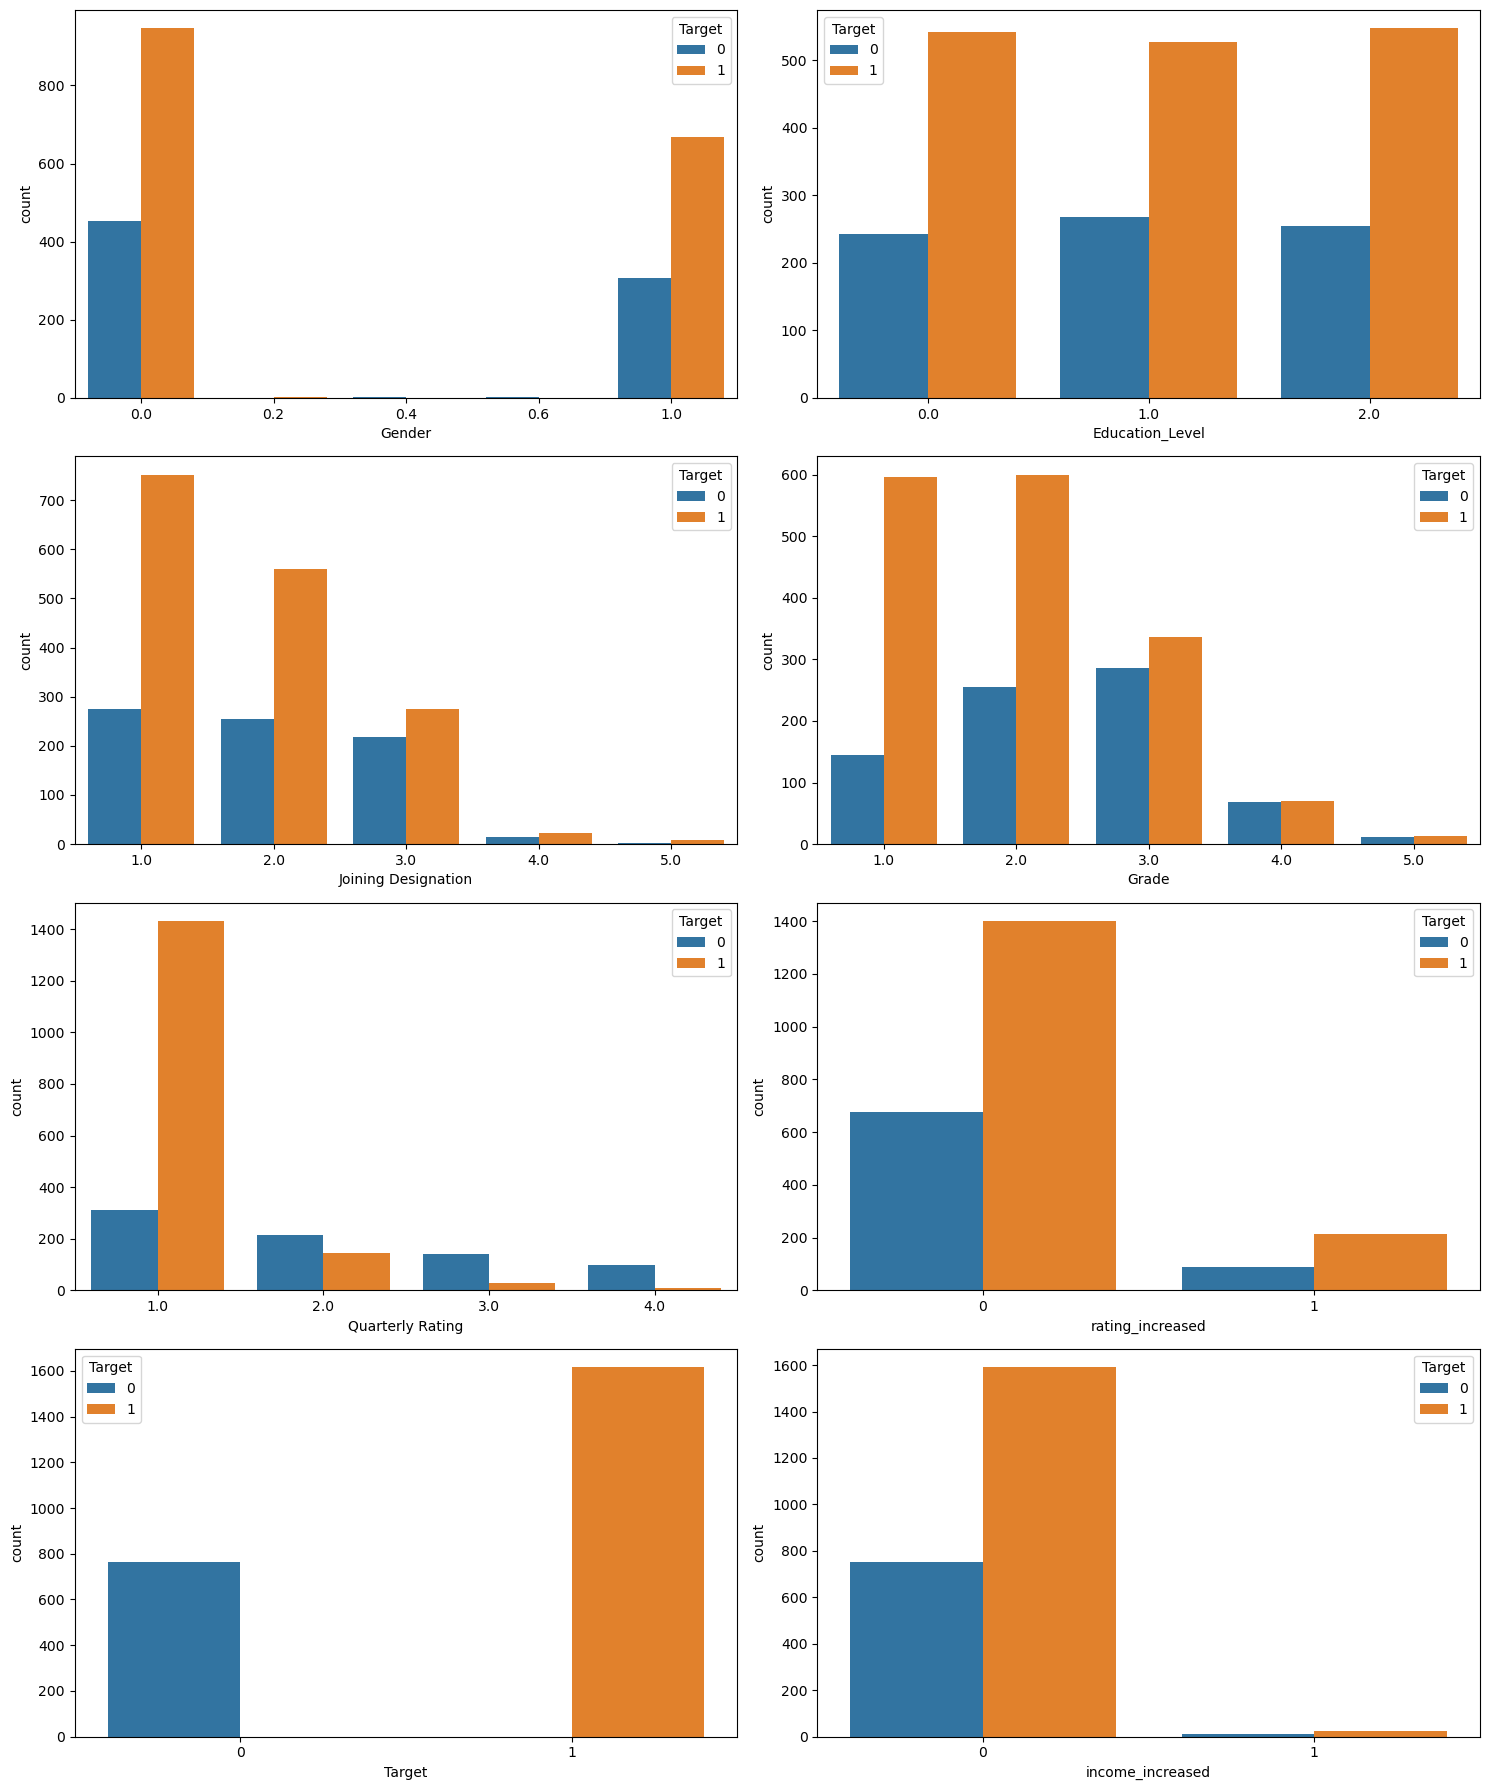

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
fig,axes = plt.subplots(4,2,figsize=(15,18))

for i in range(0,len(cat_col)):
    sns.countplot(x=cat_col[i], data=ola_df,ax=axes[i//2][i%2],hue='Target')
plt.tight_layout()
plt.show()

#### Observing the dataset we can interpret few things about the data:
    * Males quits more than females
    * Joining Desgnation 1,2 has significant Churns
    * Drivers with grade <=2 Churns significantly
    * Drivers who has rating as 1 has signifcant Churn rate
    * Increase in Rating and Income of drivers are very low  

In [25]:
from scipy.stats import chi2_contingency
cat_col.remove('Target')
for col in cat_col:
    contingency_table = pd.crosstab(ola_df[col],ola_df['Target'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    if p < 0.05:
        print(f'Significant association between {col} and Driver Quitting')

Significant association between Gender and Driver Quitting
Significant association between Joining Designation and Driver Quitting
Significant association between Grade and Driver Quitting
Significant association between Quarterly Rating and Driver Quitting


In [26]:
from scipy.stats import ttest_ind
for col in num_col:
    churned = ola_df[ola_df['Target'] == 0][col]
    not_churned = ola_df[ola_df['Target'] == 1][col]
    t_stat, p_value = ttest_ind(churned, not_churned)
    if p < 0.05:
        print(f'Significant difference between means of {col} for Drivers Churned and not Churned')
    else:
        print(col,p)

Age 0.9808999954151348
Income 0.9808999954151348
Total Business Value 0.9808999954151348


This shows that no significant difference due to Age, Income and Total business value

<Axes: xlabel='City', ylabel='count'>

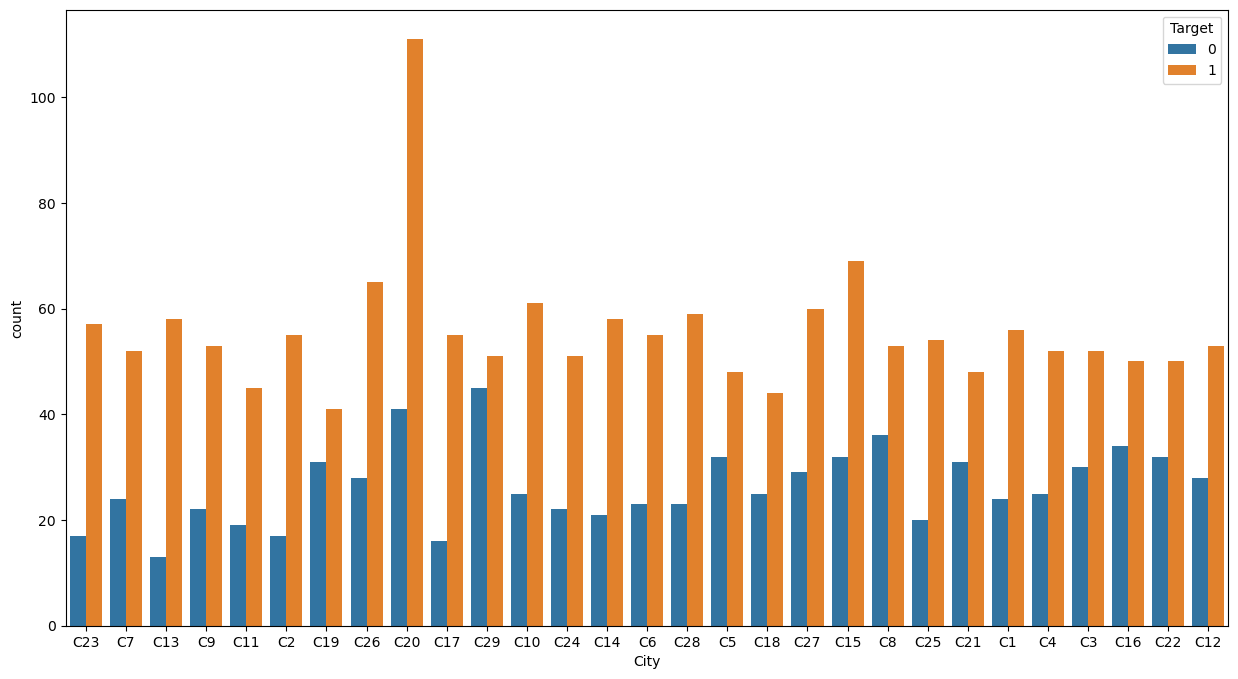

In [27]:
fig,axes = plt.subplots(figsize=(15,8))
sns.countplot(data=ola_df, x='City', hue='Target')

Compared to other cities C20 has more Churns. 

<Axes: title={'center': 'Age with Target'}, xlabel='Age_Bin'>

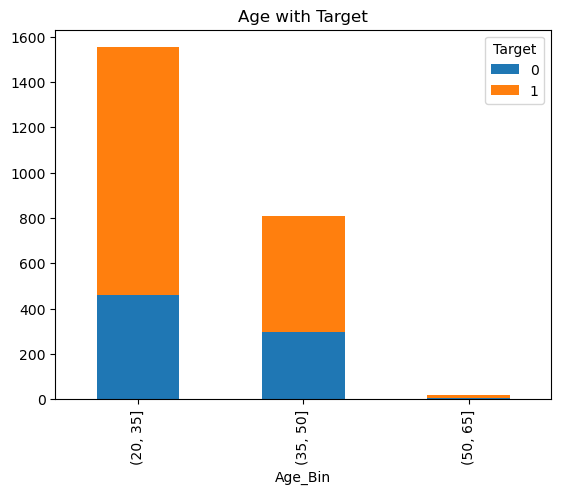

In [28]:
ola_df['Age_Bin'] = pd.cut(ola_df['Age'],bins=[20,35,50,65])
agebin = pd.crosstab(ola_df['Age_Bin'],ola_df['Target'])

agebin.plot(kind='bar',stacked=True,title="Age with Target")

In [29]:
agebin

Target,0,1
Age_Bin,,
"(20, 35]",460,1093
"(35, 50]",299,509
"(50, 65]",6,14


<Axes: title={'center': 'Age with Target'}, xlabel='Age_Bin'>

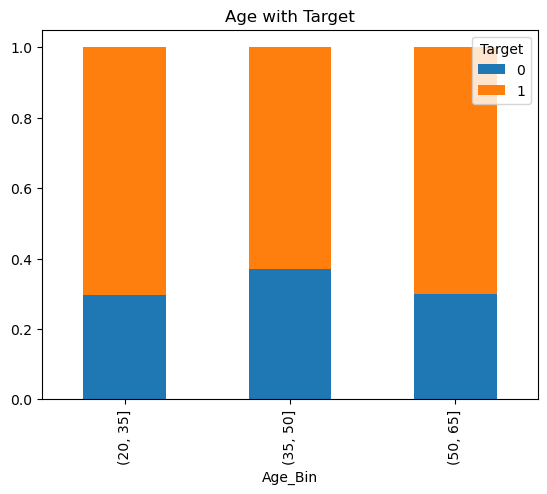

In [30]:
agebin.div(agebin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,title="Age with Target")

Churn rate of Drivers in 20-35 and 50-65 is higher than 35-50

<Axes: title={'center': 'Income with Target'}, xlabel='Income_Bin'>

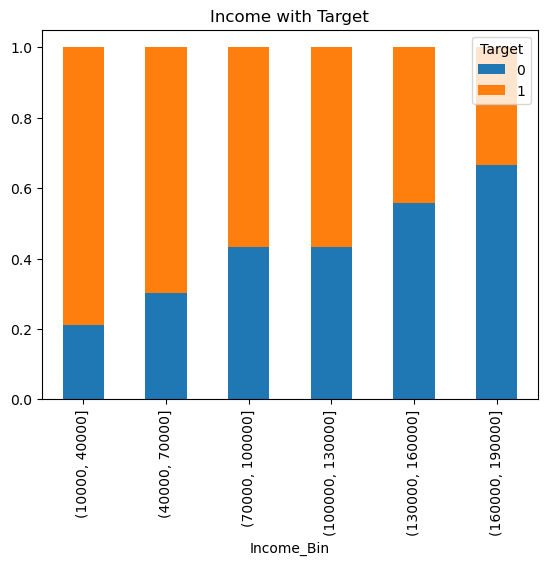

In [31]:
#Binning the Income into categories
ola_df['Income_Bin'] = pd.cut(ola_df['Income'],bins=[10000, 40000, 70000, 100000, 130000, 160000, 190000 ])

#Salary feature with Target
salarybin = pd.crosstab(ola_df['Income_Bin'],ola_df['Target'])
salarybin.div(salarybin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,title="Income with Target")

More Drivers with income bin 10,000-40,000 are Quitting 

<Axes: title={'center': 'Total Business Value with Target'}, xlabel='TBV_Bin'>

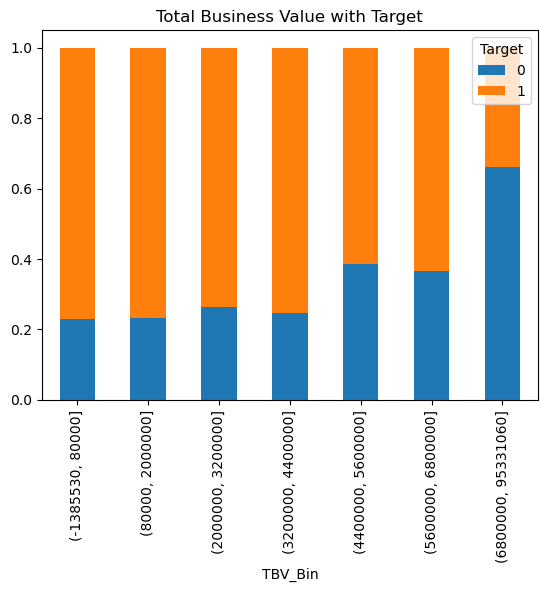

In [32]:
#Defining the bins and groups
m1 = round(ola_df['Total Business Value'].min())
m2 = round(ola_df['Total Business Value'].max())
bins = [m1, 80000 , 2000000 , 3200000, 4400000, 5600000, 6800000, m2]

#Binning the Total Business Value into categories
ola_df['TBV_Bin'] = pd.cut(ola_df['Total Business Value'],bins)

#Total Business Value feature with Target
tbvbin = pd.crosstab(ola_df['TBV_Bin'],ola_df['Target'])
tbvbin.div(tbvbin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,title="Total Business Value with Target")

* Drivers in 68,00,000-9,53,31,060 BV bin are less likely to Churn
* More Drivers with Negative  and low Business values (due to Cancel/Refund/EMI) are quiting 

# 7) Check correlation among independent variables and how they interact with each other


C:\Users\Admi\AppData\Local\Temp\ipykernel_5308\2147547322.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(ola_df.corr(),annot=True)


<Axes: >

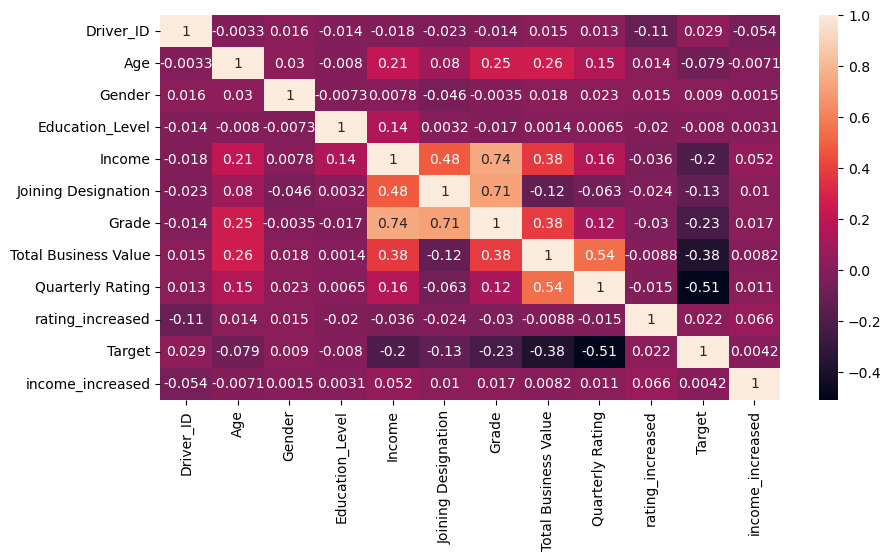

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.heatmap(ola_df.corr(),annot=True)

#### Observing the dataset we can interpret few things about the data:
    * Income and Grade is highly correlated
    * Joining designation and Grade is highly correlated
    * Total Business value and Quarterly rating is somewhat correlated

# 8) One hot encoding of the categorical variable


In [34]:

ola_df = pd.concat([ola_df,pd.get_dummies(ola_df['City'],prefix='City')],axis=1)

In [35]:
df = ola_df.drop(columns=['Driver_ID', 'MMM-YY', 'City','Dateofjoining', 'LastWorkingDate','Target','Age_Bin', 'Income_Bin', 'TBV_Bin'])

In [36]:
df

,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,rating_increased,income_increased,...,City_C27,City_C28,City_C29,City_C3,City_C4,City_C5,City_C6,City_C7,City_C8,City_C9
0,28.0,0.0,2.0,57387.0,1.0,1.0,1715580.0,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,43.0,0.0,2.0,65603.0,2.0,2.0,350000.0,1.0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,29.0,0.0,0.0,46368.0,1.0,1.0,120360.0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,31.0,1.0,1.0,78728.0,3.0,3.0,1265000.0,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,34.0,0.0,0.0,82815.0,2.0,3.0,21748820.0,4.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2377,34.0,1.0,0.0,12105.0,1.0,1.0,0.0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,1
2378,45.0,0.0,0.0,35370.0,2.0,2.0,2815090.0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2379,28.0,1.0,2.0,69498.0,1.0,1.0,977830.0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
X_cols = df.columns

In [38]:
X_cols

Index(['Age', 'Gender', 'Education_Level', 'Income', 'Joining Designation',
       'Grade', 'Total Business Value', 'Quarterly Rating', 'rating_increased',
       'income_increased', 'City_C1', 'City_C10', 'City_C11', 'City_C12',
       'City_C13', 'City_C14', 'City_C15', 'City_C16', 'City_C17', 'City_C18',
       'City_C19', 'City_C2', 'City_C20', 'City_C21', 'City_C22', 'City_C23',
       'City_C24', 'City_C25', 'City_C26', 'City_C27', 'City_C28', 'City_C29',
       'City_C3', 'City_C4', 'City_C5', 'City_C6', 'City_C7', 'City_C8',
       'City_C9'],
      dtype='object')

# 9 & 10) Class Imbalance Treatment and  Standardization of training data



In [39]:
ola_df['Target'].value_counts(normalize=True)

1    0.678706
0    0.321294
Name: Target, dtype: float64

In [40]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X=scaler.fit_transform(df)

In [41]:
#!pip install im

In [42]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

y = ola_df['Target']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 11) Using Ensemble learning - Bagging, Boosting methods with some hyper-parameter tuning


In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

param = {'max_depth':[6,7,8], 'n_estimators':[100,150,200]}

random_forest = RandomForestClassifier()

c = GridSearchCV(random_forest,param,cv=3,scoring='f1')
c.fit(X_train_resampled,y_train_resampled)

def display(results):
    print(f'Best parameters are : {results.best_params_}')
    print(f'The score is : {results.best_score_}')
display(c)
y_pred_1 = c.predict(X_test)

print(classification_report(y_test, y_pred_1))
cm = confusion_matrix(y_test, y_pred_1)
print(cm)

Best parameters are : {'max_depth': 8, 'n_estimators': 150}
The score is : 0.8457181536002848
              precision    recall  f1-score   support

           0       0.71      0.56      0.63       156
           1       0.81      0.89      0.85       321

    accuracy                           0.78       477
   macro avg       0.76      0.72      0.74       477
weighted avg       0.78      0.78      0.77       477

[[ 87  69]
 [ 35 286]]


In [44]:
import xgboost as xgb
xgboost = xgb.XGBClassifier()

c1 = GridSearchCV(xgboost,param,cv=3,scoring='f1')
c1.fit(X_train_resampled,y_train_resampled)

param = {'max_depth':[3,4,5], 'n_estimators':[50,100,150]}
def display(results):
    print(f'Best parameters are : {results.best_params_}')
    print(f'The score is : {results.best_score_}')
display(c1)
y_pred_2 = c1.predict(X_test)

print(classification_report(y_test, y_pred_2))
cm1 = confusion_matrix(y_test, y_pred_2)
print(cm1)

Best parameters are : {'max_depth': 8, 'n_estimators': 100}
The score is : 0.832073970261671
              precision    recall  f1-score   support

           0       0.69      0.60      0.64       156
           1       0.82      0.87      0.84       321

    accuracy                           0.78       477
   macro avg       0.75      0.73      0.74       477
weighted avg       0.77      0.78      0.78       477

[[ 93  63]
 [ 42 279]]


# 12) Results Evaluation:





#### 12.1 Classification Report


In [45]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

precision = precision_score(y_test, y_pred_1)
print(f"Precision: {precision:.4f}")

recall = recall_score(y_test, y_pred_1)
print(f"Recall: {recall:.4f}")

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_1).ravel()
specificity = tn / (tn + fp)
print(f"Specificity: {specificity:.4f}")

# F1 Score
f1 = f1_score(y_test, y_pred_1)
print(f"F1 Score: {f1:.4f}")


Precision: 0.8056
Recall: 0.8910
Specificity: 0.5577
F1 Score: 0.8462


In [46]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

precision = precision_score(y_test, y_pred_2)
print(f"Precision: {precision:.4f}")

recall = recall_score(y_test, y_pred_2)
print(f"Recall: {recall:.4f}")

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_2).ravel()
specificity = tn / (tn + fp)
print(f"Specificity: {specificity:.4f}")

# F1 Score
f1 = f1_score(y_test, y_pred_2)
print(f"F1 Score: {f1:.4f}")


Precision: 0.8158
Recall: 0.8692
Specificity: 0.5962
F1 Score: 0.8416


#### 12.2 ROC AUC curve

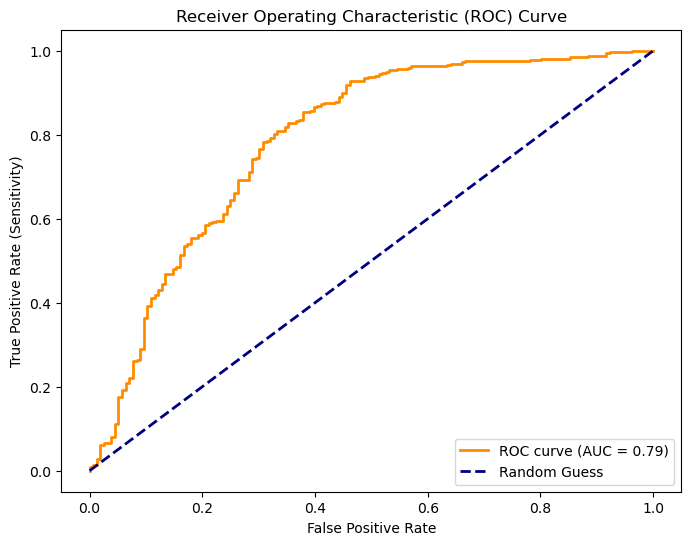

In [47]:
from sklearn.metrics import roc_curve, auc
y_probs = c.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

plt.show()

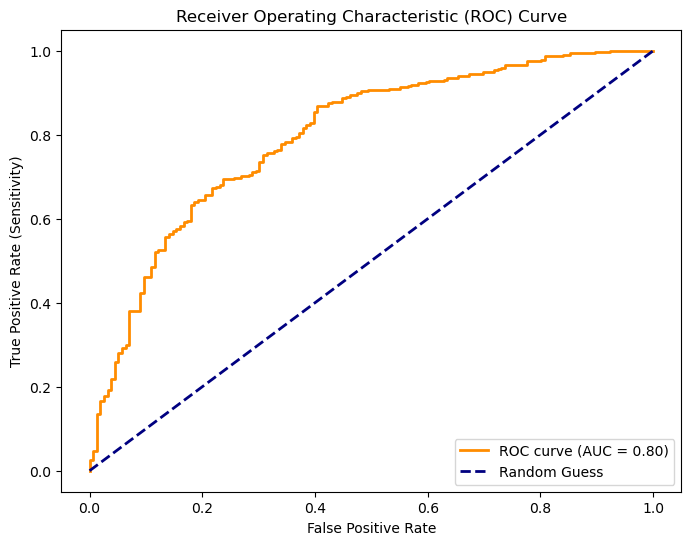

In [48]:
from sklearn.metrics import roc_curve, auc
y_probs = c1.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

plt.show()

For Churn Prediction AUC = 0.8 indicates it as a good model

# 13) Provide actionable Insights & Recommendations

We can consider increasing the payment of Drivers, but it depends on the observation of driver activities 

Driver ratings seems to be the same for every quarter, encouraging the customers to give good ratings and considering this factor to increase the income of drivers will be a good idea


Mostly youngsters between 20-35 churns addressing their issues helps in achieving an overall solution


Drivers in City C20 churns more. Focusing on Situation in C20 could be helpful to obtain a common solution

At last low income drivers, if the payments are based on the % on # of rides per month, then understanding what causes the drivers to drop a ride without attending could help to derive a common solution.

In [49]:
import pickle

In [50]:
filename = 'driver_churn.sav'
pickle.dump(c, open(filename, 'wb'))

In [51]:
len(['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','C13','C14','C15','C16','C17',
 'C18','C19','C20','C21','C22','C23','C24','C25','C26','C27','C28','C29'])


29

In [52]:
import sklearn
print(sklearn.__version__)

1.2.2


In [53]:
#!pip3 install  scikit-learn==1.2.2
#pip3 install --upgrade --force-reinstall imbalanced-learn
